# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [143]:
# Load pickled data
import pickle
import csv
from itertools import islice
# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file="valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Store sign id reference with label for future reference
signnames={}
with open('signnames.csv') as fin:
    reader=csv.reader(fin, skipinitialspace=True, quotechar="'")
    for row in islice(reader, 1, None):
        signnames[int(row[0])]=row[1:]



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [144]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [145]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

#Functions for displaying images in different ways that will be used later
import matplotlib.pyplot as plt
import random
import numpy as np
import math
# Visualizations will be shown in the notebook.
%matplotlib inline

import matplotlib.gridspec as gridspec
import matplotlib.image as mimage
from matplotlib.backends.backend_pdf import PdfPages

#Function to display an image for each of the labels
def output_images_by_label(X, y, labels):
    columns = 6
    rows = (math.ceil(len(labels)/columns))
    
    fig, axes = plt.subplots(rows, columns, figsize=(12, 12), subplot_kw={'xticks': [], 'yticks': []})
    signId = 0
    for ax in axes.flat:    
        if (signId <= len(labels) - 1): 
            if (np.array(np.where(y==signId)).shape[1] != 0):
                index = np.where(y==signId)[0][0]
                image = X[index].squeeze()
                ax.imshow(image)
                maxlabellegth = 28
                label = labels[y[index]][0]
                label = (label[:maxlabellegth] + '...') if len(label) > maxlabellegth else label
                ax.set_title(str(signId) + ": "+str(index) + ": " + label, fontsize=6)    
                plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.1)
            else:
                ax.axis('off')
        else:
            ax.axis('off')
        signId += 1

    plt.show()
    
#Function to display all images passed as input
def output_images_by_input(X, y, labels):
    columns = 6
    rows = (math.ceil(X.shape[0]/columns))
    fig, axes = plt.subplots(rows, columns, figsize=(12, 4), subplot_kw={'xticks': [], 'yticks': []})
    index = 0
    for ax in axes.flat:    
        if (index <= X.shape[0] - 1): 
            #index = np.where(y==signId)[0][0]
            image = X[index].squeeze()
            ax.imshow(image)
            maxlabellegth = 28
            label = labels[y[index]][0]
            label = (label[:maxlabellegth] + '...') if len(label) > maxlabellegth else label
            ax.set_title(str(y[index]) + ": " + label, fontsize=6)    
            #plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.1)
        else:
            ax.axis('off')
        index += 1

    plt.show()

#Function to display all images showing predicted class and actual class
def output_images_by_prediction(X, y, labels, predicts):
    columns = 6
    rows = (math.ceil(X.shape[0]/columns))
    fig, axes = plt.subplots(rows, columns, figsize=(12, 4), subplot_kw={'xticks': [], 'yticks': []})
    index = 0
    for ax in axes.flat:    
        if (index <= X.shape[0] - 1): 
            #index = np.where(y==signId)[0][0]
            image = X[index].squeeze()
            ax.imshow(image)
            maxlabellegth = 28
            label = labels[y[index]][0]
            label = (label[:maxlabellegth] + '...') if len(label) > maxlabellegth else label
            predictlabel = labels[predicts[index][0]][0]
            predictlabel = (predictlabel[:maxlabellegth] + '...') if len(predictlabel) > maxlabellegth else predictlabel
            ax.set_title("Predicted: " + predictlabel + "\nWas: " + label, fontsize=6)    
            #plt.subplots_adjust(left=0.1, right=0.9, top=1.2, bottom=0.1)
        else:
            ax.axis('off')
        index += 1

    plt.show()
    
#Function to display all images showing an horizontal barchart with the softmax probabilities of the predicted classes   
def output_images_with_predictions(X, y, labels, softmax):
    for index in range(X.shape[0]):
        plt.subplot(231)
        image = X[index].squeeze()
        plt.imshow(image, interpolation='nearest', aspect='auto')
        plt.title(labels[y[index]][0])

        #pyplot.subplot(232)
        axR = plt.subplot(2,3,2, frameon=False)
        axR.yaxis.tick_right()
        axR.yaxis.set_label_position("right")
        axR.set_xlim(0, 1)
        val = softmax[0][index]
        #print(val)

        pos = np.arange(5)+0.5    # the bar centers on the y axis

        plt.barh(pos,val, align='center')

        predlabels = tuple([str(labels[j][0]) for j in softmax[1][index]])

        plt.yticks(pos, predlabels)

        plt.title("Correct" if y[index] == softmax[1][index][0] else "Fail")

        plt.show()



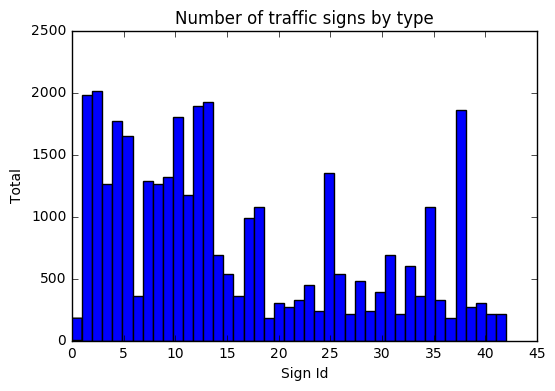

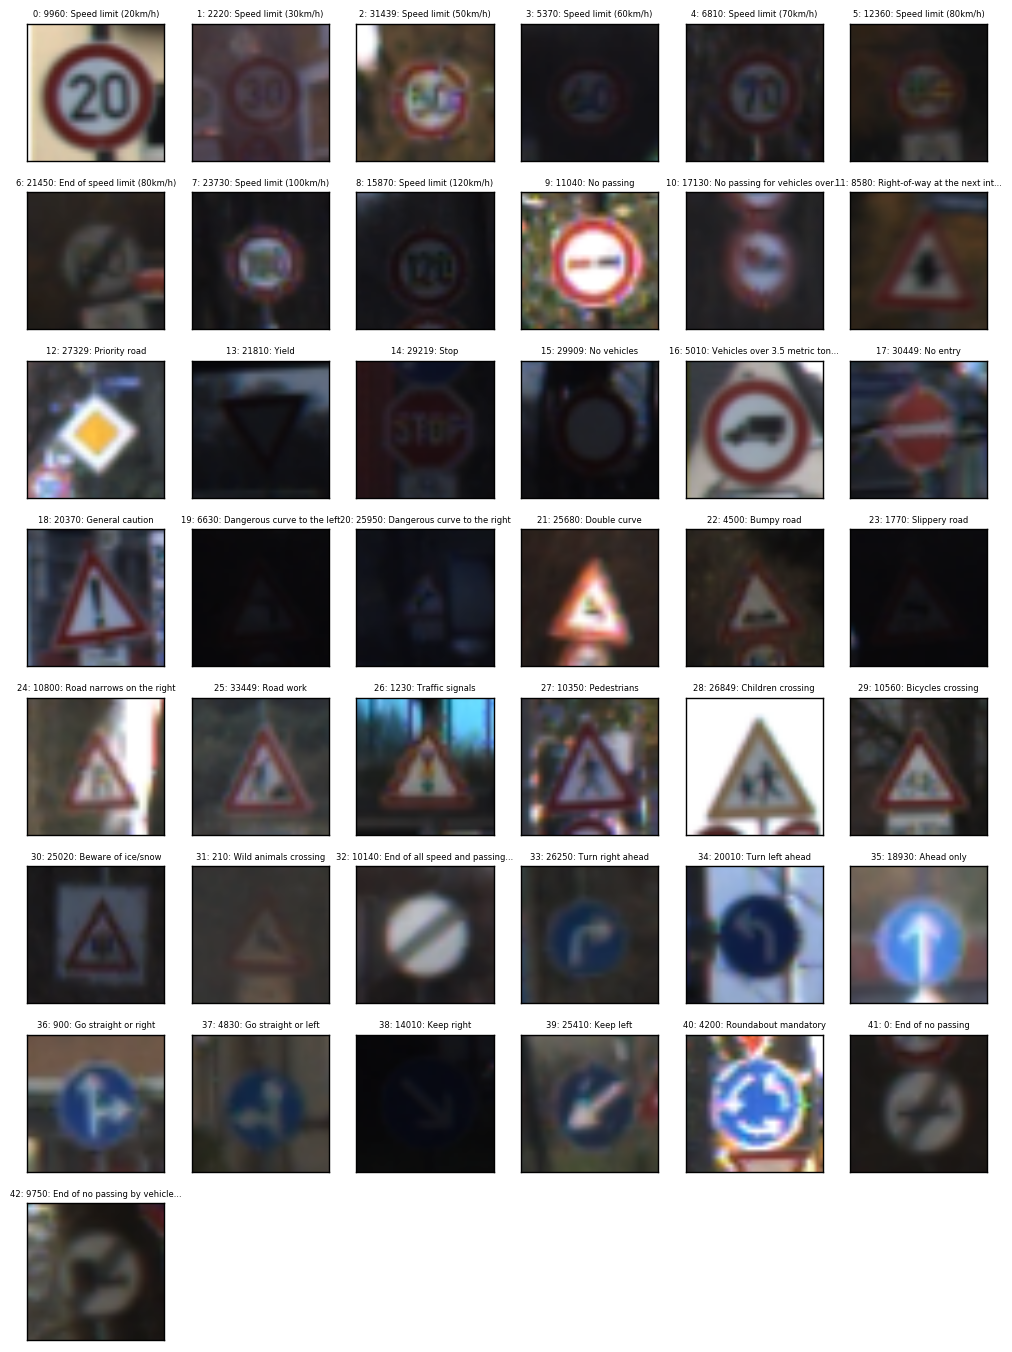

In [146]:
#Display an histogram for the number of signs of each type on the training set
plt.hist(y_train, bins=n_classes)
plt.title('Number of traffic signs by type')
plt.xlabel('Sign Id')
plt.ylabel('Total')
plt.plot()

#Display for each different label an image of that type
output_images_by_label(X_train, y_train, signnames)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [147]:
### Functions for preprocessing the images

#Function to preprocess input
def preprocess(X):
    X = grayscale(X)
    X = normalize(X)
    return X

#Function to normalize
def normalize(X):    
    X = (X - X.mean()) / (np.max(X) - np.min(X))
    return X

#Function to tranform 3 color channels into one averaged
#The average is weighted based on the preceived brightness
def grayscale(X):    
    X = 0.2989 * X[:,:,:, 0] + 0.5870 * X[:, :, :, 1] + 0.1140 * X[:, :, :, 2];
    X = X.reshape(X.shape + (1,))    
    return X

#Function to increase the number of examples but rotating and flipping the images
def augment(X, y):
    X, y = augment_type(X, y, 'H')
    X, y = augment_type(X, y, 'V')
    #X, y = augment_type(X_train, y_train, '90')
    X, y = augment_type(X, y, '180')
    X, y = augment_type(X, y, 'R')

    return X, y

#Function to increase the number of examples based on rotation/flipping type
def augment_type(X, y, flipType):
    flip_horiz_signs = [11,13,15,17,18,22,26,30,35,12]
    flip_vert_signs = [1,5,12,15,17]
    flip_180_signs = [32]
    flip_90_signs = [40]
    flip_reuse_signs =[[19,20], [33,34],[36,37],[38,39],[20,19],[34,33],[37, 36],[39, 38]]
    
    if (flipType == 'H'):
        signIds = flip_horiz_signs
    elif (flipType == 'V'):
        signIds = flip_vert_signs
    elif (flipType == '180'):
        signIds = flip_180_signs
    #elif (flipType == '90'):
    #    signIds = flip_90_signs
    else:
        signIds = flip_reuse_signs
        
    if (len(np.array(signIds).shape) == 1):
        for signId in signIds:
            indexes = np.where(y==signId)
            xtraY = np.empty(len(indexes[0]))
            xtraY.fill(int(signId))
            xtraX = X[indexes[0]]
            if (flipType == 'H'):           
                xtraX = xtraX[:, :, ::-1, :]
                X = np.append(X, xtraX, axis=0)
                y = np.append(y, xtraY)
            elif (flipType == 'V'):
                xtraX = np.fliplr(xtraX)
                X = np.append(X, xtraX, axis=0)
                y = np.append(y, xtraY)
            elif (flipType == '180'):
                xtraX = np.fliplr(xtraX[:, :, ::-1, :])
                X = np.append(X, np.fliplr(np.flipud(X[indexes[0]])), axis=0)
                y = np.append(y, xtraY)
    elif (len(np.array(signIds).shape) == 2):
        for signId1, signId2 in signIds:
                indexes = np.where(y==signId1)
                xtraY = np.empty(len(indexes[0]))
                xtraY.fill(int(signId2))
                xtraX = X[indexes[0]]                                
                xtraX = xtraX[:, :, ::-1, :]
                X = np.append(X, xtraX, axis=0)
                y = np.append(y, xtraY)
    return X, y
        
#Function to rotate an image
def rotate(X, y, degree):
    X = np.append(X, ndimage.rotate(X, degree, mode='nearest',cval=100, reshape=False), axis=0)
    y = np.append(y, y)
    return X, y


In [148]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import numpy as np
from skimage import exposure

#Normalize and convert to grayscale (1 color dimension instead of 3)
X_train = preprocess(X_train)
X_valid = preprocess(X_valid)

### Augment the Data Set (flipping, rotation...)

Training set size before augmenting: 34799
Training set size after augmenting: 62457


[]

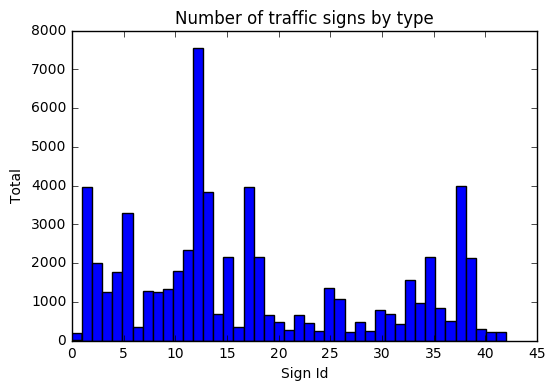

In [149]:
#Augment training set
size_before = len(X_train)
X_train, y_train = augment(X_train, y_train)
size_after = len(X_train)
print('Training set size before augmenting: {0}\nTraining set size after augmenting: {1}'.format(size_before, size_after))

#Display an histogram for the number of signs of each type on the training set after augmentation
plt.hist(y_train, bins=n_classes)
plt.title('Number of traffic signs by type')
plt.xlabel('Sign Id')
plt.ylabel('Total')
plt.plot()

In [150]:
from sklearn.utils import shuffle

#Shuffle examples
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

### Model Architecture

In [151]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def TrafficSigns(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # SOLUTION: Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION: Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [152]:
#Variables
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [153]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
rate = 0.001
EPOCHS = 250
BATCH_SIZE = 128

#Get logits
logits = TrafficSigns(x)

#Softmax cross entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

#Calculate loss
loss_operation = tf.reduce_mean(cross_entropy)

#Apply optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)

#Minimize loss
training_operation = optimizer.minimize(loss_operation)

In [154]:
#Compare predictions
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

#Calculate accuracy
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Save model
saver = tf.train.Saver()

#Function to evalute the accuracy of the model
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Training...

EPOCH 1 ...
Validation Accuracy = 0.641

EPOCH 2 ...
Validation Accuracy = 0.831

EPOCH 3 ...
Validation Accuracy = 0.857

EPOCH 4 ...
Validation Accuracy = 0.897

EPOCH 5 ...
Validation Accuracy = 0.907

EPOCH 6 ...
Validation Accuracy = 0.920

EPOCH 7 ...
Validation Accuracy = 0.927

EPOCH 8 ...
Validation Accuracy = 0.926

EPOCH 9 ...
Validation Accuracy = 0.932

EPOCH 10 ...
Validation Accuracy = 0.937

EPOCH 11 ...
Validation Accuracy = 0.934

EPOCH 12 ...
Validation Accuracy = 0.940

EPOCH 13 ...
Validation Accuracy = 0.949

EPOCH 14 ...
Validation Accuracy = 0.947

EPOCH 15 ...
Validation Accuracy = 0.945

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.956

EPOCH 18 ...
Validation Accuracy = 0.960

EPOCH 19 ...
Validation Accuracy = 0.952

EPOCH 20 ...
Validation Accuracy = 0.952

EPOCH 21 ...
Validation Accuracy = 0.958

EPOCH 22 ...
Validation Accuracy = 0.963

EPOCH 23 ...
Validation Accuracy = 0.959

EPOCH 24 ...
Validation Accura

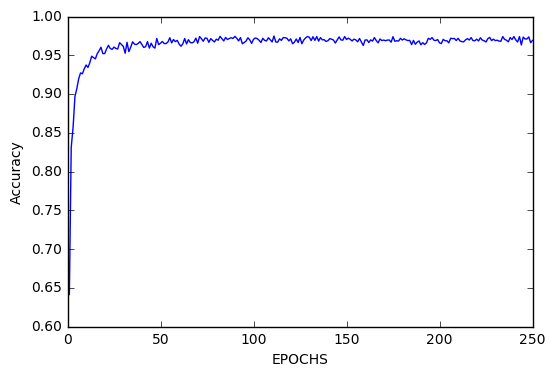

In [155]:
#Train the model and calculate accuracy
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    acc = []
    print("Training...")
    print()
    for i in range(EPOCHS):        
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

            
        validation_accuracy = evaluate(X_valid, y_valid)
        acc = np.append(acc, validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()        
        
    saver.save(sess, './traffproject')
    print("Model saved")
    
    x_epoch = np.array([i+1 for i in range(len(acc))])
    plt.xlabel('EPOCHS')
    plt.ylabel('Accuracy')
    plt.plot(x_epoch,acc)
    plt.show()

In [156]:
#Test model on the testing set

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    X_testdata = preprocess(X_test)
    #test_accuracy = evaluate(X_test, y_test)
    
    test_accuracy = sess.run(accuracy_operation, feed_dict={x: X_testdata, y: y_test, keep_prob : 1.0})
    print("Accuracy on the testing set = {:.3f}".format(test_accuracy))
    
    val_accuracy = sess.run(accuracy_operation, feed_dict={x: X_valid, y: y_valid, keep_prob : 1.0})
    print("Accuracy on the validation set = {:.3f}".format(val_accuracy))
    
    train_accuracy = sess.run(accuracy_operation, feed_dict={x: X_train, y: y_train, keep_prob : 1.0})
    print("Accuracy on the training set = {:.3f}".format(train_accuracy))


Accuracy on the testing set = 0.947
Accuracy on the validation set = 0.969
Accuracy on the training set = 0.999


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

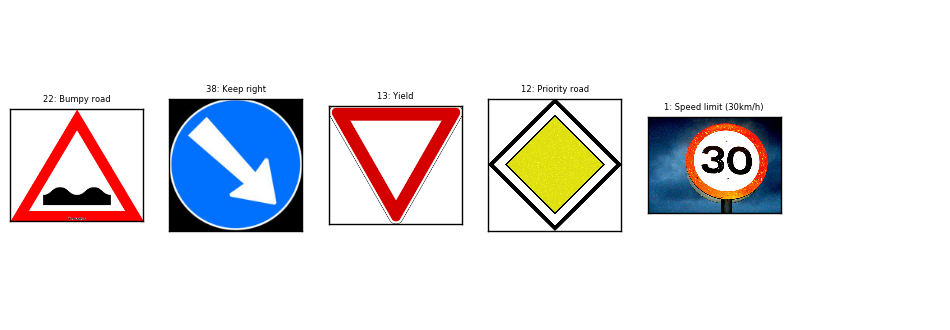

In [161]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import scipy.misc
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

total_img = 5
X_data = []
X_data_raw = []

#imgPath = "new_images/german/0000"
#imgExt = ".ppm"
#y_new = np.array([7,3,9,35,3,3,42,20,7,14])

#Load 5 new images
imgPath = "new_images/web/"
imgExt = ".jpg"
y_new = np.array([22,38,13,12,1])

for i in range(total_img):
    img = scipy.misc.imread(imgPath + str(i) + imgExt)
    X_data_raw.append(img)
    img2 = scipy.misc.imresize(img, (32, 32)) 
    X_data.append(img2)
    
    
#Resize newe images to fit the model
X_new = np.array(X_data)

#Display images resized
output_images_by_input(np.array(X_data_raw), y_new, signnames)



### Predict the Sign Type for Each Image

In [162]:
#Preprocess new images
X_new_processed = preprocess(X_new)

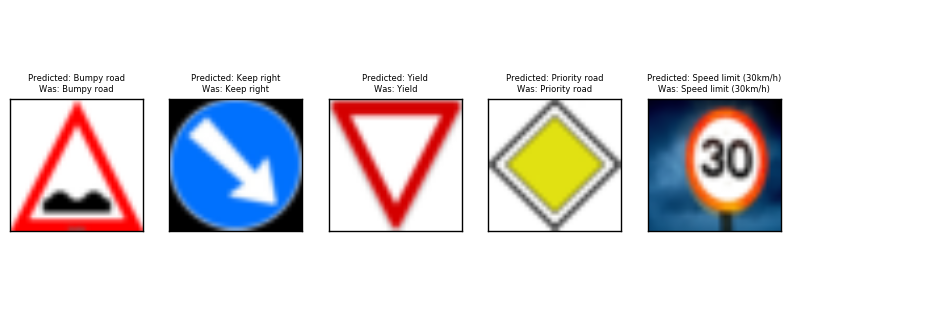

In [163]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_new_processed, y_new)
    
    #Get top 1 predicted class for each image
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 1),feed_dict={x: X_new_processed, keep_prob:1.0})
    predicts = np.array(output[1])
    
    #Display images showing predicted class and actual class
    output_images_by_prediction(X_new, y_new, signnames, np.array(output[1]))

### Analyze Performance

In [164]:
### Display accuracy
print("Test Accuracy = {:.3f}".format(test_accuracy))
print("{:.0f}% of new images correctly classified".format(test_accuracy * 100))

Test Accuracy = 1.000
100% of new images correctly classified


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [165]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

#Show Top 5 softmax probabilities

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
            
    output = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5),feed_dict={x: X_new_processed, keep_prob:1.0})
    
    for i in range(len(output[0])):
        print("Image {0} ({1})".format(i+1, signnames[y_new[i]][0]))
        print("Top 5 probabilites: {0}".format(output[0][i]))
        print("Top 5 indexes: {0}".format(output[1][i]))
        print()
    

Image 1 (Bumpy road)
Top 5 probabilites: [  1.00000000e+00   1.54103184e-13   4.27531466e-23   7.22614437e-25
   2.02705995e-27]
Top 5 indexes: [22 38 26 29 24]

Image 2 (Keep right)
Top 5 probabilites: [ 1.  0.  0.  0.  0.]
Top 5 indexes: [38  0  1  2  3]

Image 3 (Yield)
Top 5 probabilites: [ 1.  0.  0.  0.  0.]
Top 5 indexes: [13  0  1  2  3]

Image 4 (Priority road)
Top 5 probabilites: [  1.00000000e+00   6.98530760e-16   1.94420941e-16   1.23793261e-17
   1.91082030e-24]
Top 5 indexes: [12 13 39 15  1]

Image 5 (Speed limit (30km/h))
Top 5 probabilites: [ 0.73438287  0.23592307  0.01351789  0.01249629  0.00168125]
Top 5 indexes: [ 1 36 38  6 14]



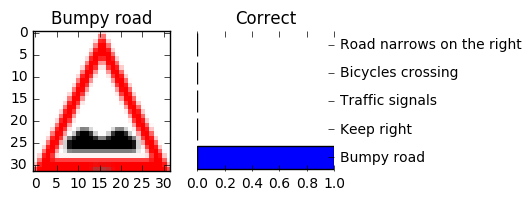

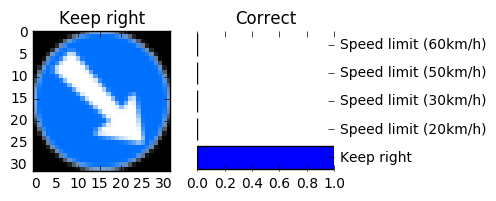

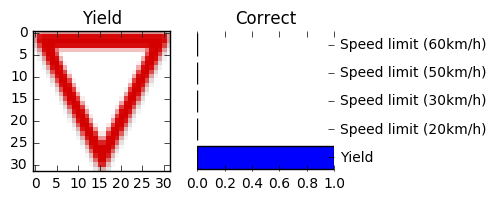

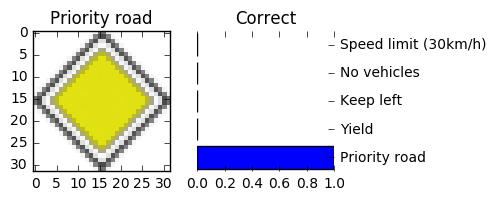

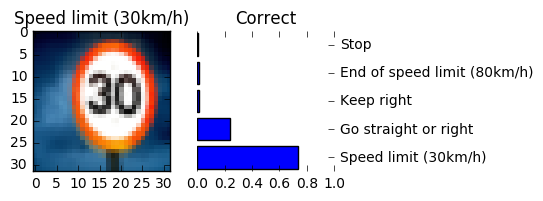

In [166]:
#Display test image with an horizontal barchart with the sofmax probabilites of the predictions
output_images_with_predictions(X_new, y_new, signnames, output)



> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 